In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Graph SLAM Problem

$\min J(x_i) = x_0^T\Omega_0 x_0 + \sum_t e_t R_t^{-1} e_t  + \sum_t \sum_i \tilde{z}^i_t  Q_t^{-1} \tilde{z}^i_t \$

$ e_t \equiv x_t - g(u_t, x_{t-1})$ prediction error at time t

$\tilde{z}^i_t \equiv z^i_t - h(x_t, m^i_t)$ measurement error

$\dot{p_x} = v_x$

$\dot{p_y} = v_y$

$x_t = \begin{bmatrix} p_x \\ p_y \end{bmatrix}$
$u_t = \begin{bmatrix} v_x \\ v_y \end{bmatrix}$

$x_t = x_{t-1} + \Delta_t u_t $

$g(u_t, x_t{-1}) = x_{t-1}  + \Delta_t u_t$

Landmarks are points. And our measurement is relative position.

In [22]:
def g(x, u, dt):
    "prediction"
    return x + u*dt

def h(x, m):
    "measurement"
    return m - x

def data_association(x, z, landmarks):
    z_expected = landmarks - x
    z_error = z - z_expected
    dist = np.linalg.norm(z_error, axis=1)
    i = np.argmin(dist)
    return i

def measure(x, landmarks):
    z_list = []
    for m in landmarks:
        #print(np.linalg.norm(m - x))
        if np.linalg.norm(m - x) < 3:
            z_list.append(m - x)
    return z_list

saw landmark 0 at time 0.000000
saw landmark 0 at time 1.000000
saw landmark 0 at time 2.000000
saw landmark 1 at time 3.000000
saw landmark 1 at time 4.000000
saw landmark 1 at time 5.000000


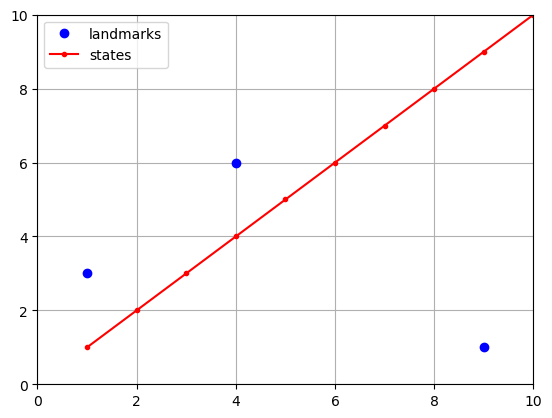

In [23]:
x = np.array([0, 0])
u = np.array([1, 1])
dt = 1
landmarks = np.array([
    [1, 3],
    [4, 6],
    [9, 1]
])

hist = {
    'x': [],
    'u': []
}

for i in range(10):
    t = dt*i
    x = g(x, u, dt) # predict
    # measure
    z_list = measure(x, landmarks)
    
    for z in z_list:
        i = data_association(x, z, landmarks)
        print('saw landmark {:d} at time {:f}'.format(i, t))
        
    hist['x'].append(x)
    hist['u'].append(u)

for key in hist.keys():
    hist[key] = np.array(hist[key])
    
    
plt.figure(1)
plt.plot(landmarks[:, 0], landmarks[:, 1], 'bo', label='landmarks')
plt.axis([0, 10, 0, 10])
plt.grid()
plt.plot(hist['x'][:, 0], hist['x'][:, 1], 'r.-', label='states')
plt.legend()